In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
column_names = ['ID', 'Entity', 'Sentiment', 'Tweet_Content']

df = pd.read_csv('twitter_training.csv', names=column_names)

df.head()

,ID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [38]:
df.dropna(subset=['Tweet_Content'], inplace=True)

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)

    text = " ".join([word for word in text.split() if word not in stop_words])
    return text


df['Clean_Tweet'] = df['Tweet_Content'].apply(clean_text)

print(f"Dataset shape after cleaning: {df.shape}")

Dataset shape after cleaning: (73996, 5)


/tmp/ipython-input-1686613214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


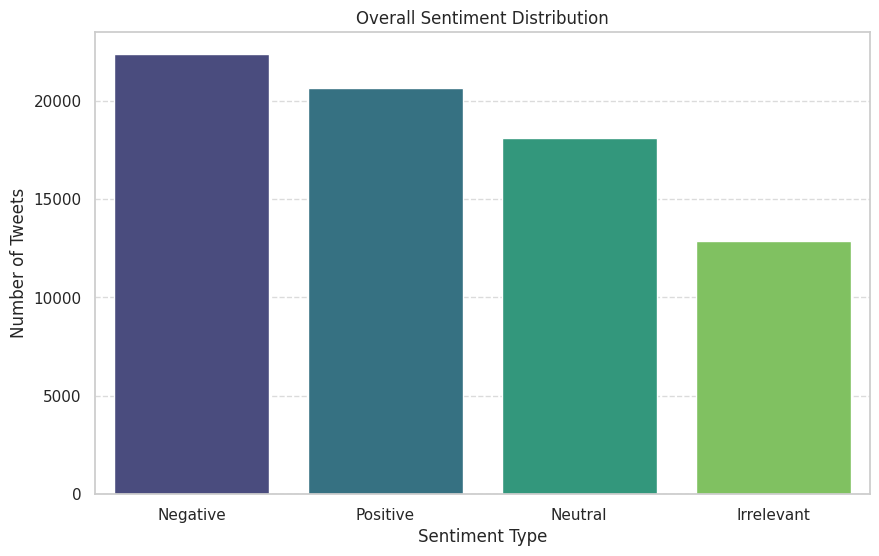

In [39]:
plt.figure(figsize=(10, 6))
sentiment_counts = df['Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')

plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

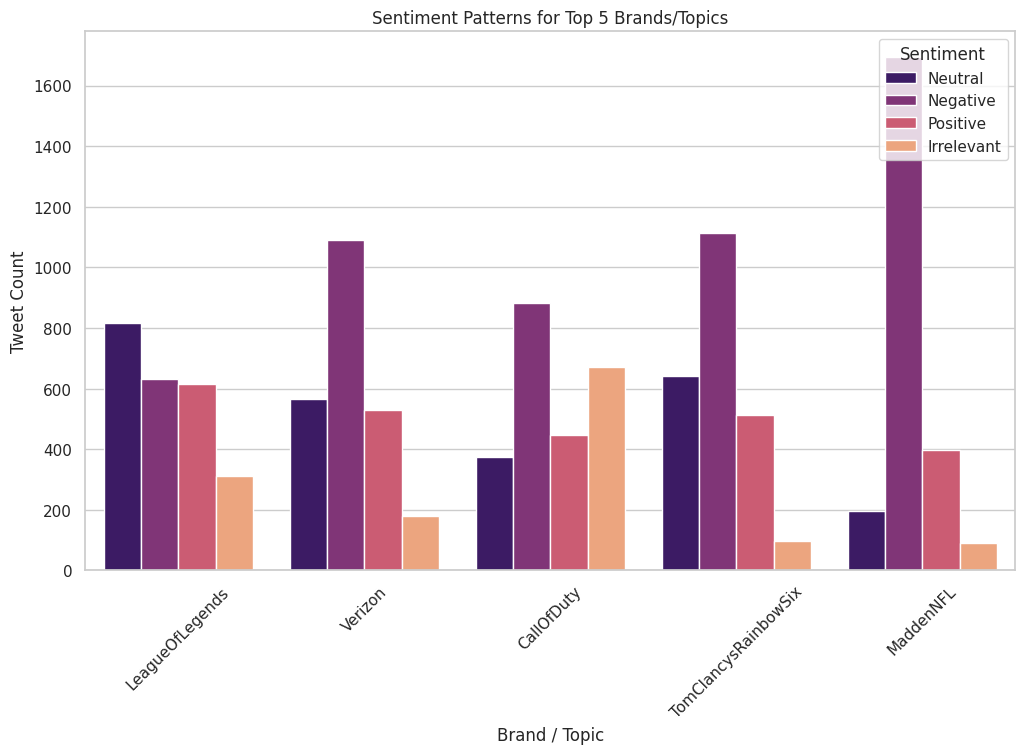

In [40]:
top_entities = df['Entity'].value_counts().head(5).index
df_top_entities = df[df['Entity'].isin(top_entities)]

plt.figure(figsize=(12, 7))
sns.countplot(data=df_top_entities, x='Entity', hue='Sentiment', palette='magma')

plt.title('Sentiment Patterns for Top 5 Brands/Topics')
plt.xlabel('Brand / Topic')
plt.ylabel('Tweet Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.show()

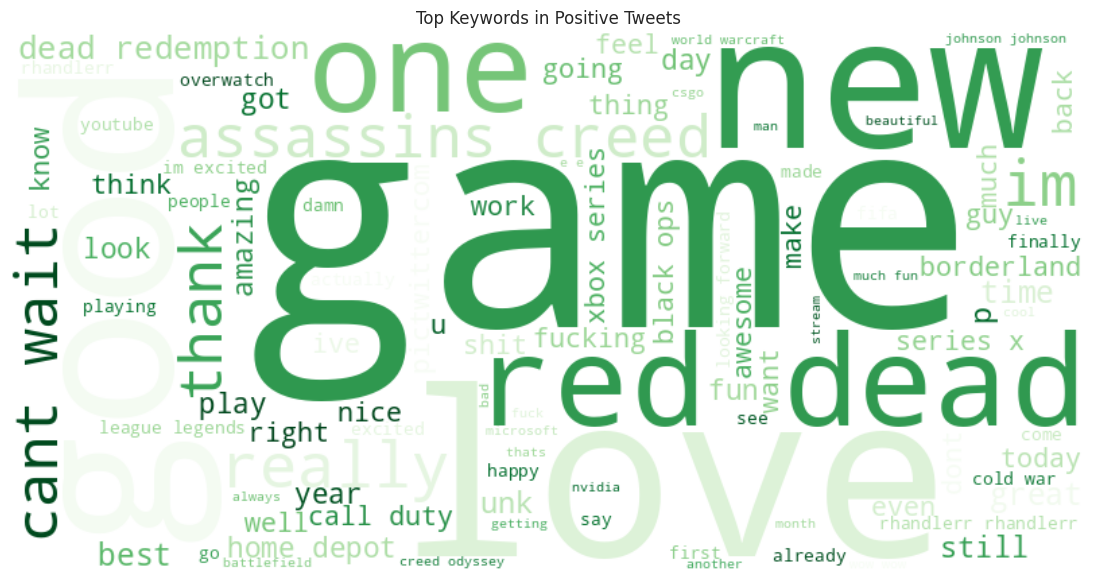

In [41]:
positive_text = " ".join(df[df['Sentiment'] == 'Positive']['Clean_Tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white',
                      colormap='Greens', max_words=100).generate(positive_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top Keywords in Positive Tweets')
plt.show()